In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
ordinal_lasso = pd.read_csv('Ordinal+Lasso.csv')
ordinal_lasso.shape

(2580, 84)

In [3]:
X_ordinal = ordinal_lasso.drop(['SalePrice'], axis=1).values
Y_ordinal = ordinal_lasso.SalePrice.values

In [4]:
X_ordinal.shape

(2580, 83)

In [5]:
len(Y_ordinal)

2580

In [6]:
X_ordinal.shape[1]

83

In [7]:
AR2_Ordinal = []
MAE_Ordinal = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_ordinal,Y_ordinal,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    xgb = XGBRegressor()
    xgb.fit(X_train_scaled, Y_train)
    
    pred = xgb.predict(X_test_scaled)
    
    XGB_Score = xgb.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - XGB_Score) * (len(Y_ordinal)-1)/(len(Y_ordinal)-X_ordinal.shape[1]-1)
    AR2_Ordinal.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Ordinal.append(mae)

In [8]:
Ordinal = pd.DataFrame({'AR2_Ordinal': AR2_Ordinal, 'MAE_Ordinal': MAE_Ordinal})
Ordinal

,AR2_Ordinal,MAE_Ordinal
0,0.934690,12285.170512
1,0.946159,12819.061265
2,0.945449,12004.599885
3,0.934249,11833.535847
4,0.932392,12715.127653
5,0.933325,12781.297311
6,0.945198,11819.176532
7,0.895843,12436.763778
8,0.924742,12065.480590
9,0.899031,13383.153985


In [9]:
Ordinal.describe()

,AR2_Ordinal,MAE_Ordinal
count,100.000000,100.000000
mean,0.928634,12145.702305
std,0.018944,563.965692
min,0.870227,10676.690940
25%,0.918930,11773.901225
50%,0.935178,12151.943944
75%,0.942371,12525.774665
max,0.958768,13645.205269


In [10]:
ord_lasso_drop1 = pd.read_csv('Ordinal+Lasso_Drop1.csv')
ord_lasso_drop1.shape

(2579, 84)

In [11]:
X_ord_drop1 = ord_lasso_drop1.drop(['SalePrice'], axis=1).values
Y_ord_drop1 = ord_lasso_drop1.SalePrice.values

In [12]:
X_ord_drop1.shape

(2579, 83)

In [13]:
len(Y_ord_drop1)

2579

In [14]:
X_ord_drop1.shape[1]

83

In [15]:
AR2_Drop1 = []
MAE_Drop1 = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_ord_drop1,Y_ord_drop1,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    xgb = XGBRegressor()
    xgb.fit(X_train_scaled, Y_train)
    
    pred = xgb.predict(X_test_scaled)
    
    XGB_Score = xgb.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - XGB_Score) * (len(Y_ord_drop1)-1)/(len(Y_ord_drop1)-X_ord_drop1.shape[1]-1)
    AR2_Drop1.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_Drop1.append(mae)

In [16]:
OrdinalDrop1 = pd.DataFrame({'AR2_Drop1': AR2_Drop1, 'MAE_Drop1': MAE_Drop1})
OrdinalDrop1

,AR2_Drop1,MAE_Drop1
0,0.945577,11915.782092
1,0.940268,11602.641988
2,0.932007,13128.277616
3,0.929855,12196.605729
4,0.940462,11531.944780
5,0.944339,11467.611204
6,0.929742,12809.831226
7,0.931332,12234.490704
8,0.940903,12353.512094
9,0.942673,12425.141824


In [17]:
OrdinalDrop1.describe()

,AR2_Drop1,MAE_Drop1
count,100.000000,100.000000
mean,0.939017,12014.997534
std,0.007170,479.778686
min,0.908758,10763.954203
25%,0.935094,11653.232876
50%,0.939982,12064.413039
75%,0.943525,12383.781769
max,0.958188,13128.277616


In [19]:
ord_lasso_dropIF = pd.read_csv('Ordinal+Lasso_DropIF.csv')
ord_lasso_dropIF.shape

(2568, 84)

In [20]:
X3 = ord_lasso_dropIF.drop(['SalePrice'], axis=1).values
Y3 = ord_lasso_dropIF.SalePrice.values

In [21]:
X3.shape

(2568, 83)

In [22]:
len(Y3)

2568

In [23]:
X3.shape[1]

83

In [24]:
AR2_DropIF = []
MAE_DropIF = []

for i in range(100):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X3,Y3,test_size=0.25)
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    xgb = XGBRegressor()
    xgb.fit(X_train_scaled, Y_train)
    
    pred = xgb.predict(X_test_scaled)
    
    XGB_Score = xgb.score(X_test_scaled, Y_test)
    
    Adj_r2 = 1 - (1 - XGB_Score) * (len(Y3)-1)/(len(Y3)-X3.shape[1]-1)
    AR2_DropIF.append(Adj_r2)
    
    mae = mean_absolute_error(Y_test, pred)
    MAE_DropIF.append(mae)

In [25]:
OrdinalDropIF = pd.DataFrame({'AR2_DropIF': AR2_DropIF, 'MAE_DropIF': MAE_DropIF})
OrdinalDropIF

,AR2_DropIF,MAE_DropIF
0,0.927925,12325.365752
1,0.947156,11833.782911
2,0.940279,11816.819607
3,0.938399,11679.208425
4,0.936400,12453.765260
5,0.934844,11620.738099
6,0.940985,11601.664020
7,0.943582,11355.110397
8,0.943615,11191.485732
9,0.934414,12319.170530


In [26]:
OrdinalDropIF.describe()

,AR2_DropIF,MAE_DropIF
count,100.000000,100.000000
mean,0.941179,11791.856682
std,0.006559,434.412031
min,0.921656,10642.599549
25%,0.937509,11544.589778
50%,0.941095,11816.875365
75%,0.945477,12095.744964
max,0.958931,12713.842898


In [27]:
box = pd.concat([Ordinal, OrdinalDrop1, OrdinalDropIF], axis=1)
box

,AR2_Ordinal,MAE_Ordinal,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
0,0.934690,12285.170512,0.945577,11915.782092,0.927925,12325.365752
1,0.946159,12819.061265,0.940268,11602.641988,0.947156,11833.782911
2,0.945449,12004.599885,0.932007,13128.277616,0.940279,11816.819607
3,0.934249,11833.535847,0.929855,12196.605729,0.938399,11679.208425
4,0.932392,12715.127653,0.940462,11531.944780,0.936400,12453.765260
5,0.933325,12781.297311,0.944339,11467.611204,0.934844,11620.738099
6,0.945198,11819.176532,0.929742,12809.831226,0.940985,11601.664020
7,0.895843,12436.763778,0.931332,12234.490704,0.943582,11355.110397
8,0.924742,12065.480590,0.940903,12353.512094,0.943615,11191.485732
9,0.899031,13383.153985,0.942673,12425.141824,0.934414,12319.170530


In [28]:
box.describe()

,AR2_Ordinal,MAE_Ordinal,AR2_Drop1,MAE_Drop1,AR2_DropIF,MAE_DropIF
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.928634,12145.702305,0.939017,12014.997534,0.941179,11791.856682
std,0.018944,563.965692,0.007170,479.778686,0.006559,434.412031
min,0.870227,10676.690940,0.908758,10763.954203,0.921656,10642.599549
25%,0.918930,11773.901225,0.935094,11653.232876,0.937509,11544.589778
50%,0.935178,12151.943944,0.939982,12064.413039,0.941095,11816.875365
75%,0.942371,12525.774665,0.943525,12383.781769,0.945477,12095.744964
max,0.958768,13645.205269,0.958188,13128.277616,0.958931,12713.842898


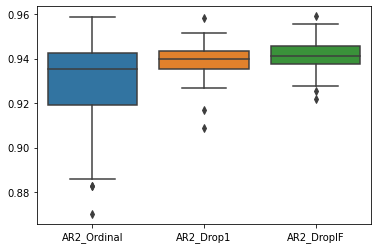

In [29]:
sns.boxplot(data=box[['AR2_Ordinal','AR2_Drop1','AR2_DropIF']]);

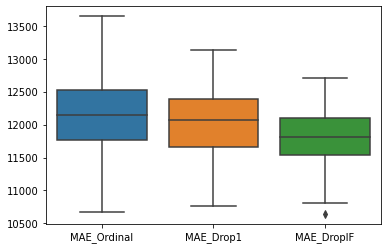

In [30]:
sns.boxplot(data=box[['MAE_Ordinal','MAE_Drop1','MAE_DropIF']]);